In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Our data and check it out

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check any missing data

In [3]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
## Split our data into Columns and Numerical features
num_cols = raw_data.select_dtypes(include=['float', 'int']).columns
cat_cols = raw_data.select_dtypes(include=['object']).columns
## Create dataframes of our features
num_data = raw_data[num_cols]
cat_data = raw_data[cat_cols]

# Add survived to our cat_data
cat_data['Survived'] = raw_data['Survived'].copy()

C:\Users\pc\AppData\Local\Temp\ipykernel_27948\3849484069.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Survived'] = raw_data['Survived'].copy()


<AxesSubplot: >

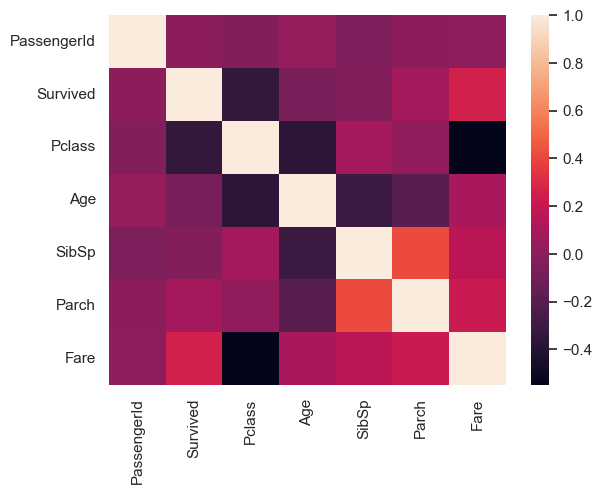

In [6]:
corr = raw_data.corr()
sns.heatmap(corr)

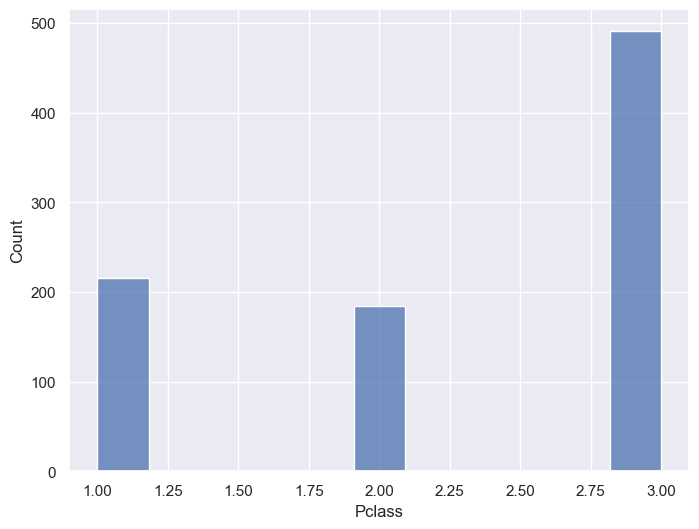

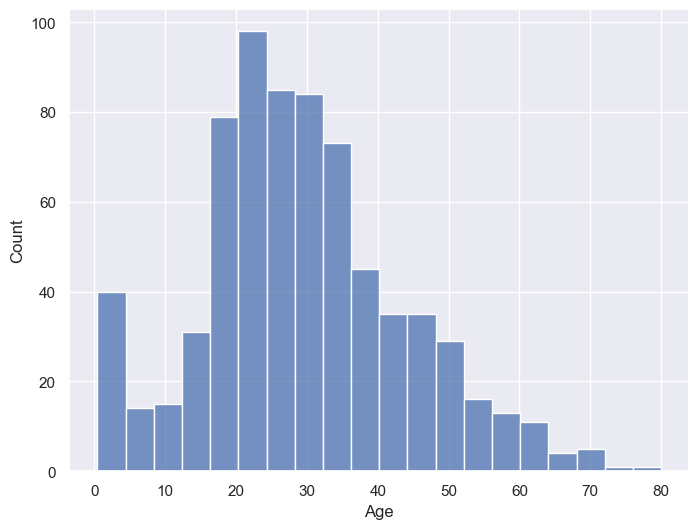

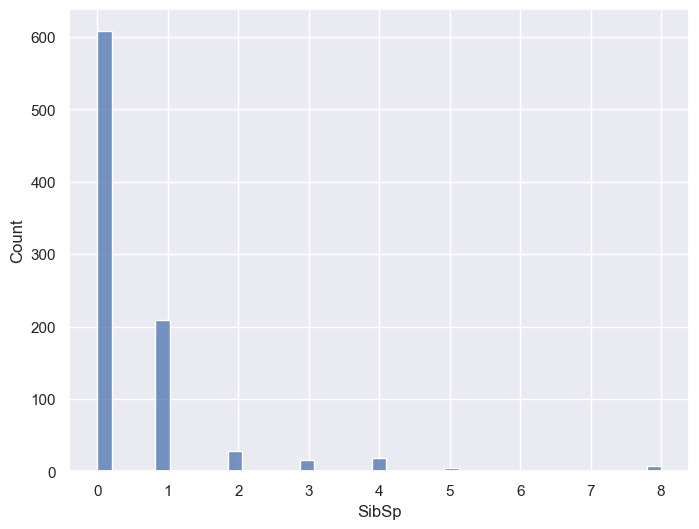

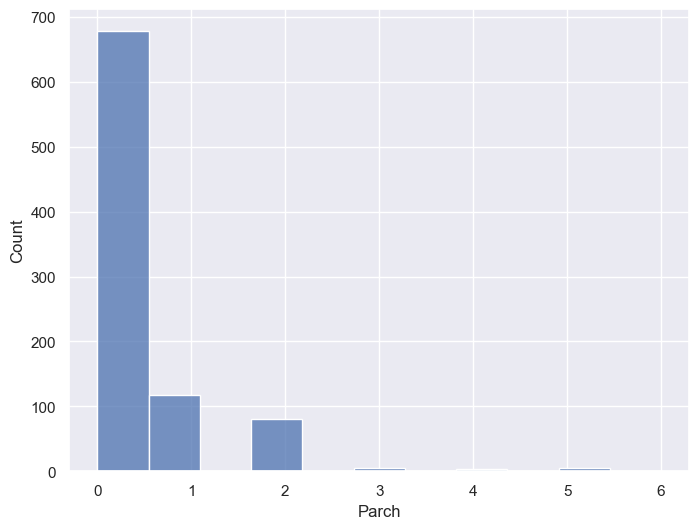

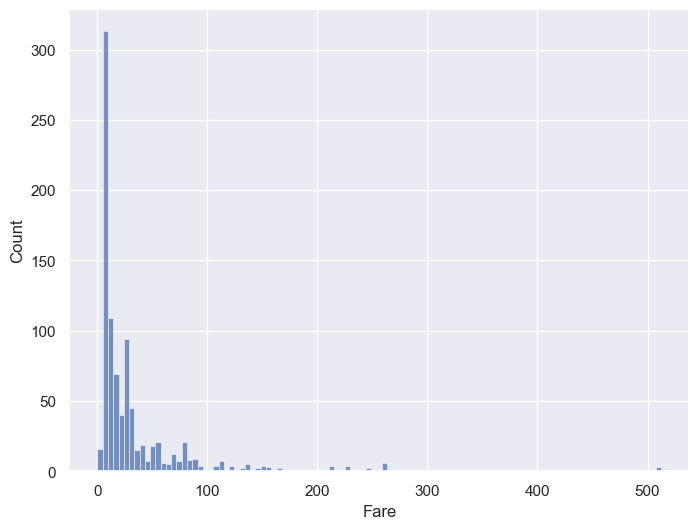

In [7]:
def plot_numerical_features(data):
    for col in data.iloc[:,2:].columns:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data[col], ax=ax)
        plt.show()
plot_numerical_features(num_data)        


## Now we will check our Age data distribution

In [8]:
pd.pivot_table(num_data,index='Survived')


,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


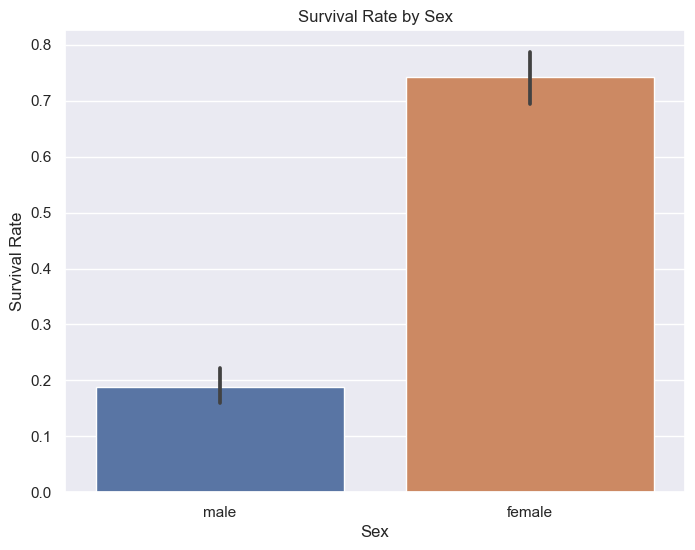

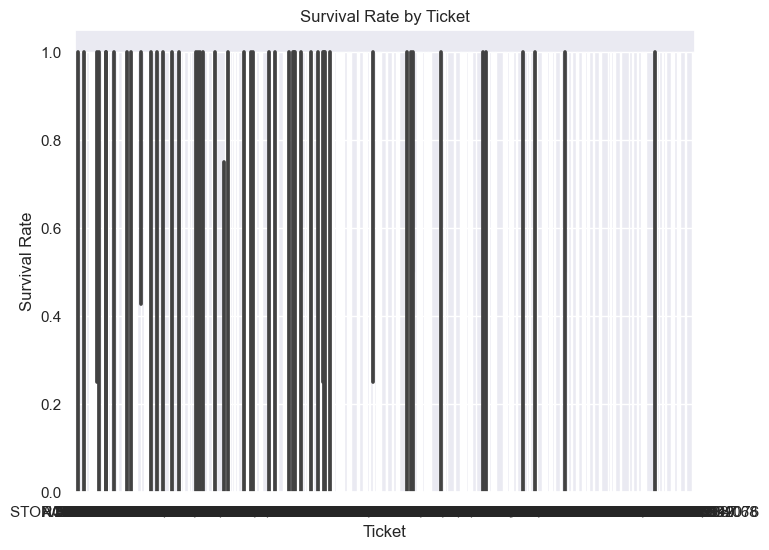

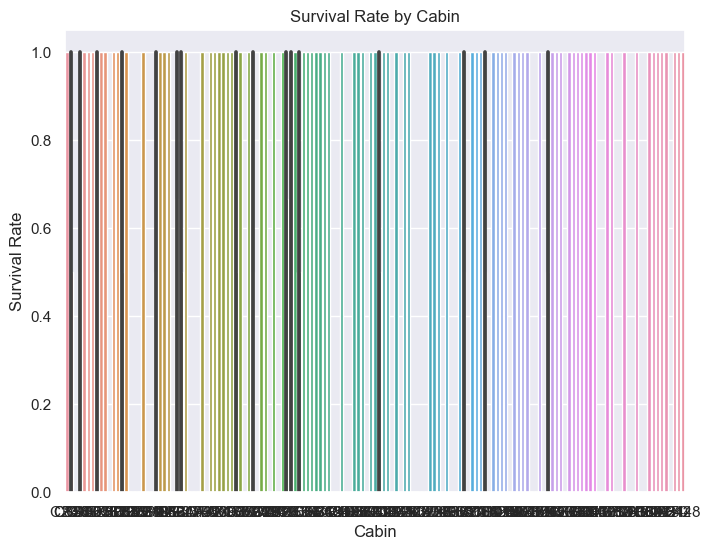

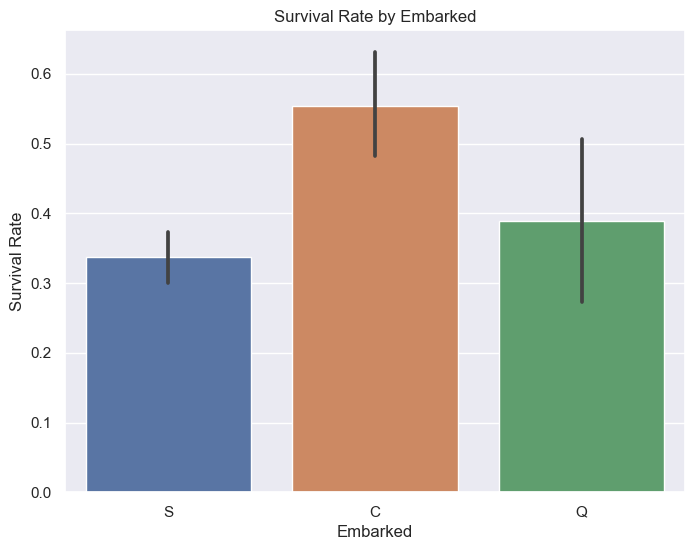

In [10]:
cat_cols = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for col in cat_cols:
        if cat_data[col].dtype == 'object' and col != 'Survived':
            plt.figure(figsize=(8, 6))
            sns.barplot(x=col, y='Survived', data=cat_data)
            plt.title(f'Survival Rate by {col}')
            plt.ylabel('Survival Rate')
            plt.show()


In [11]:
##Individually check each Numerical feature, missing values first lets deal with those
num_data.isnull().sum()
data_no_mv = raw_data.copy()
data_no_mv.Age = raw_data.Age.fillna(raw_data.Age.median())

In [12]:
cat_data.isnull().sum()
cat_data.Embarked.value_counts() ## There is only two missing vbalues for embarked so we will just add them to the Mode which is S
data_no_mv['Embarked'].fillna('S',inplace=True)

In [13]:
#Now we will look more at cabn, There is alot of missing values so it doesnt make sense so impute all of them at the moment, we could after taking a deeper analysis of our data but for now we will keep null as a category
# First we will use only the cabin letter and drop the Numbers
data_no_mv.Cabin.fillna('N0',inplace=True)
data_no_mv.Cabin.isnull().sum()

0

In [14]:
## Made 2 new columns of the cab char and the char numbers and then we will drop the original cabins
data_no_mv['Cab_char']= data_no_mv.Cabin.str[0]
# data_no_mv['Cab_num'] = data_no_mv.Cabin.str[1:]
data_no_mv = data_no_mv.drop('Cabin', axis=1)


In [15]:
# data_no_mv['Cab_num'] = data_no_mv['Cab_num'].str.split().str[0]
# data_no_mv['Cab_num'] = pd.to_numeric(data_no_mv['Cab_num'], errors='coerce')


In [17]:
# data_no_mv.drop('Cab_num',axis=1,inplace=True)

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cab_char, dtype: int64

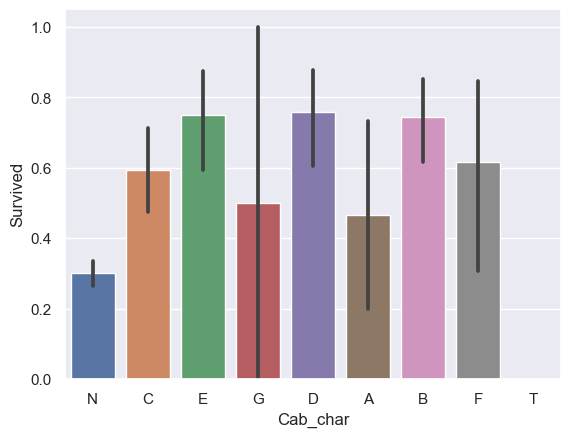

In [19]:
# Nowe we will plot our cabin and survived to try spot any patterns
sns.barplot(x='Cab_char',y='Survived',data = data_no_mv)
data_no_mv.Cab_char.value_counts()

We will be using the None cabin as it seems very impactful to the survival rate

In [20]:
# We will now take a look at the titles from the names
data_engineer = data_no_mv.copy()
data_engineer['Title'] = data_engineer['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
data_engineer.Title.value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cab_char       0
Title          1
dtype: int64

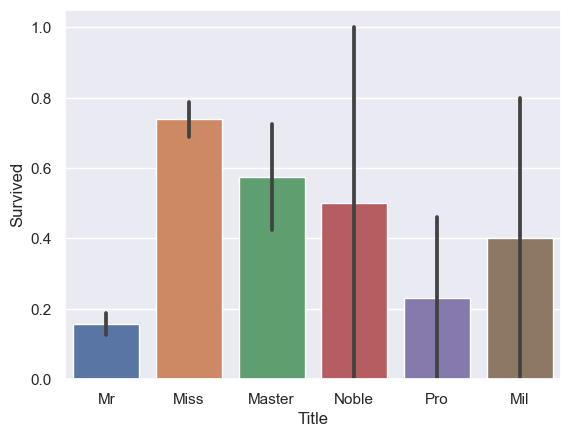

In [21]:
data_engineer.Title.value_counts()
titles_dict = {'Mil' : ['Col','Capt','Major'] ,
               'Noble':['Sir','Lady','Jonkheer','Don'],
               'Miss': ['Miss','Mlle','Mme','Ms','Mrs'],
              'Pro' : ['Rev','Dr']
              }
for keys ,values in titles_dict.items():
    data_engineer['Title'] = data_engineer['Title'].replace(values,keys)
sns.barplot(x='Title',y='Survived',data = data_engineer)    
data_engineer.Title.value_counts()
data_engineer.isnull().sum()

In [24]:
data_engineer[data_engineer.Title.isnull()] #it seems that our original way of extracting titles didnt do so for The countess so we will add it to the royals/nobles
data_engineer.Title.fillna('Noble',inplace=True)



# We can clearly see how signifcant it is Being a Miss/Master as opposed to being a Mr,  My intuition was that military personnel and doctors/religious professions would more likely to die so we will see

<AxesSubplot: xlabel='Fare', ylabel='Survived'>

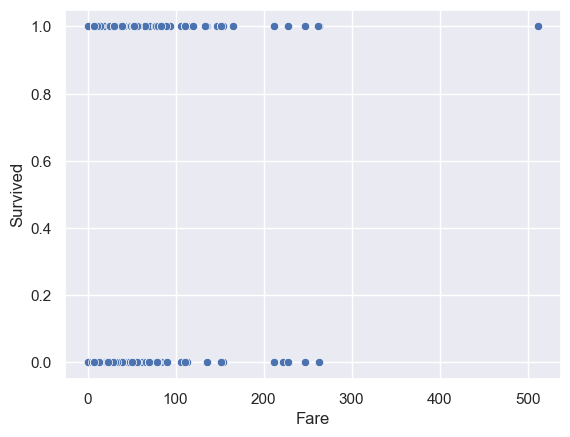

In [25]:
sns.scatterplot(x=data_engineer.Fare,y=data_engineer.Survived)

In [27]:
import scipy.stats as stats
def clip_outliers(df, column, mode='zscore', threshold=3):
    data = df[column]
    if mode == 'zscore':
        z = np.abs(stats.zscore(data))
        df[column] = np.where(z > threshold, np.sign(data)*threshold, data)
    elif mode == 'iqr':
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - threshold*iqr
        upper = q3 + threshold*iqr
        df[column] = np.where(data < lower, lower, np.where(data > upper, upper, data))
    elif mode == 'quantile':
        lower = data.quantile(threshold)
        upper = data.quantile(1-threshold)
        df[column] = np.where(data < lower, lower, np.where(data > upper, upper, data))
    else:
        print("Invalid mode. Please choose either 'zscore', 'iqr', or 'quantile'.")


In [28]:
copy_1 = data_engineer.copy()



In [57]:
clip_outliers(data_engineer,column='Fare',mode='iqr')
data_engineer.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cab_char       0
Title          0
dtype: int64

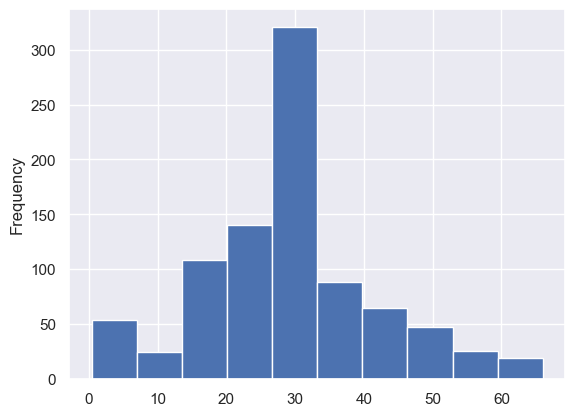

In [62]:
# sns.scatterplot(x=data_engineer.Age,y=data_engineer.Survived)
# clip_outliers(data_engineer,column='Age')
data_engineer.Age.plot.hist()
data_engineer.drop('Ticket',inplace=True,axis=1)

In [63]:
data_no_outliers = data_engineer.copy()
data_engineer.describe(include='all')



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cab_char,Title
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,9,6
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,N,Mr
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,646,687,517
mean,446.000000,0.383838,2.308642,NaN,28.816689,0.523008,0.381594,27.043158,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,12.651172,1.102743,0.806057,27.339465,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


## Scaling Function

Now we will create a function that will scale the columns we give, we dont need to scale all our columns we only need to scale some of them Age,Fare we are creating a function as to make it easier while changing our model

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_dataframe_columns(df, columns, method='standard'):
    """
    Scales the specified columns of a pandas DataFrame using one of the scaling methods available in sklearn.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        columns (list of str): The names of the columns to scale.
        method (str, optional): The scaling method to use. Must be one of 'standard', 'minmax', or 'robust'. Default is 'standard'.

    Returns:
        pandas.DataFrame: The scaled DataFrame.
    """
    df_new = df.copy()
    scaler = None
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError(f"Unknown scaling method '{method}'")

    scaled_data = scaler.fit_transform(df[columns])
    df_new[columns] = scaled_data

    return df_new


In [65]:
scaled_dataframe = scale_dataframe_columns(data_no_outliers,columns=['Age','Fare'],method='standard')

<AxesSubplot: ylabel='Frequency'>

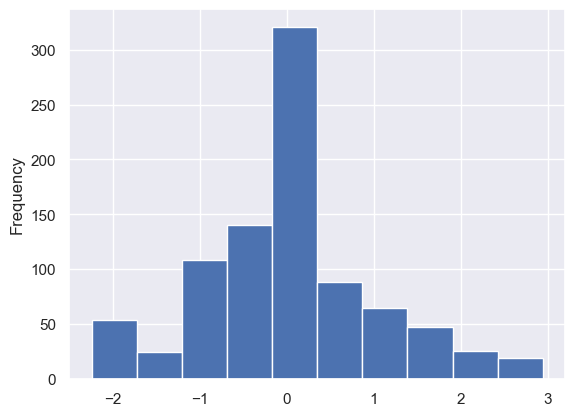

In [67]:
scaled_dataframe.Age.plot.hist()

In [68]:
inputs = scaled_dataframe.drop(columns=['PassengerId','Survived'])
targets = scaled_dataframe['Survived']

In [69]:
inputs_dummies = pd.get_dummies(columns=['Embarked','Cab_char','Title','Sex'],drop_first=True,data=inputs)
inputs_dummies

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Cab_char_B,Cab_char_C,Cab_char_D,...,Cab_char_F,Cab_char_G,Cab_char_N,Cab_char_T,Title_Mil,Title_Miss,Title_Mr,Title_Noble,Title_Pro,Sex_male
0,3,-0.539121,1,0,-0.724384,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,0.726294,1,0,1.619088,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.222768,0,0,-0.699681,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0.489028,1,0,0.953621,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0.489028,0,0,-0.695106,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,-0.143679,0,0,-0.513947,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
887,1,-0.776387,0,0,0.108214,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
888,3,-0.064591,1,2,-0.131501,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
889,1,-0.222768,0,0,0.108214,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## Train/dev split our model 

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(inputs_dummies,targets,test_size=0.2)

## Create a function that will evaluate a model and return Accuracy and confusion matrix

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_model(x_train, x_test, y_train, y_test, model):
    # fit the model to the training data
    model.fit(x_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(x_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # plot confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    f1 = f1_score(y_test,y_pred)
    # return accuracy and confusion matrix
    return accuracy, cm , f1


## Create the list of  the models that we would like to evaluate and loop through them printing out the CM and their relative accuracy

In [108]:
# create a list of models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(7),
    SVC()
]

# iterate through the list of models and evaluate each one
for model in models:
    accuracy, cm,f1 = evaluate_model(x_train, x_test, y_train, y_test,model)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy,"F1_Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("="*80)


LogisticRegression
Accuracy: 0.8603351955307262 F1_Score: 0.8226950354609929
Confusion Matrix:
 [[96 10]
 [15 58]]
RandomForestClassifier
Accuracy: 0.8379888268156425 F1_Score: 0.8
Confusion Matrix:
 [[92 14]
 [15 58]]
GaussianNB
Accuracy: 0.776536312849162 F1_Score: 0.7183098591549297
Confusion Matrix:
 [[88 18]
 [22 51]]
KNeighborsClassifier
Accuracy: 0.8100558659217877 F1_Score: 0.7500000000000001
Confusion Matrix:
 [[94 12]
 [22 51]]
SVC
Accuracy: 0.8491620111731844 F1_Score: 0.8029197080291972
Confusion Matrix:
 [[97  9]
 [18 55]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Trying a Hard voting Classifier 

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier


# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with hard voting
hard_voting_model = VotingClassifier(estimators=models, voting='hard')

# fit the model to the training data and make predictions on the test data
hard_voting_model.fit(x_train, y_train)
y_pred_hard = hard_voting_model.predict(x_test)

# calculate accuracy score
accuracy_hard = accuracy_score(y_test, y_pred_hard)

# print the accuracy score
print("Hard Voting Accuracy:", accuracy_hard)


Hard Voting Accuracy: 0.8212290502793296


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Trying a soft voting classifer

In [88]:
# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with soft voting
soft_voting_model = VotingClassifier(estimators=models, voting='soft')

# fit the model to the training data and make predictions on the test data
soft_voting_model.fit(x_train, y_train)
y_pred_soft = soft_voting_model.predict(x_test)

# calculate accuracy score
accuracy_soft = accuracy_score(y_test, y_pred_soft)

# print the accuracy score
print("Soft Voting Accuracy:", accuracy_soft)


Soft Voting Accuracy: 0.8100558659217877


## Possible Improvments to be done

# Feature Engineering 
    Create a family variable
    2-Look more closely at cabin numbers or ticket numbers and see if they are important
    3- Create new feature to do with age*Class
# Different outlier techniques    
# Transformation/Scaling of Fare feature.    
# Use cross Validation to choose better hyper parameters

We will now import our test set and perform the same preprocessing as the train data


In [129]:
test_raw = pd.read_csv('test.csv')
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Deal with missing values

In [130]:
test_raw.isnull().sum()
test_raw.Age.fillna(raw_data.Age.median(),inplace=True)
test_raw.Cabin.fillna('N',inplace=True)
test_raw.Fare.fillna(test_raw.Fare.median(),inplace=True)

## Preproccess our data

In [132]:
test_no_mv = test_raw.copy()
test_engineer= test_no_mv.copy()
test_engineer['Cab_char']= test_engineer.Cabin.str[0]
test_engineer['Title'] = test_engineer['Name'].str.extract(r',\s*([A-Za-z]+)\.', expand=False)
test_engineer.Title.value_counts()




Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [141]:
titles_test_dict = {'Mil' : ['Col','Capt','Major'] ,
               'Noble':['Sir','Lady','Jonkheer','Don','Dona'],
               'Miss': ['Miss','Mlle','Mme','Ms','Mrs'],
              'Pro' : ['Rev','Dr']
              }
for keys ,values in titles_test_dict.items():
    test_engineer['Title'] = test_engineer['Title'].replace(values,keys)
test_engineer.Title.value_counts()


Mr        240
Miss      151
Master     21
Pro         3
Mil         2
Noble       1
Name: Title, dtype: int64

In [145]:
test_engineer.head()
# test_engineer.drop(columns=['Cabin','Name','Ticket'],inplace=True)

In [154]:
clip_outliers(test_engineer,column='Fare',mode='iqr')
clip_outliers(test_engineer,column='Age')

In [156]:
scaled_test_dataframe = scale_dataframe_columns(test_engineer,columns=['Age','Fare'],method='standard')

In [164]:
test_inputs = scaled_test_dataframe.drop(columns=['PassengerId'])


In [166]:
test_dummies = pd.get_dummies(test_inputs,columns=['Embarked','Cab_char','Title','Sex'],drop_first=True)
test_dummies.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Cab_char_B,Cab_char_C,Cab_char_D,Cab_char_E,Cab_char_F,Cab_char_G,Cab_char_N,Title_Mil,Title_Miss,Title_Mr,Title_Noble,Title_Pro,Sex_male
0,3,0.389038,0,0,-0.702736,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,3,1.387676,1,0,-0.731694,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,2.586040,0,0,-0.637839,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,-0.210144,0,0,-0.673635,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
4,3,-0.609599,1,1,-0.547041,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [167]:
test_dummies.shape, inputs_dummies.shape

((418, 20), (891, 21))

In [171]:
inputs_dummies.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Cab_char_B', 'Cab_char_C', 'Cab_char_D', 'Cab_char_E', 'Cab_char_F',
       'Cab_char_G', 'Cab_char_N', 'Cab_char_T', 'Title_Mil', 'Title_Miss',
       'Title_Mr', 'Title_Noble', 'Title_Pro', 'Sex_male'],
      dtype='object')

In [170]:
test_dummies.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Cab_char_B', 'Cab_char_C', 'Cab_char_D', 'Cab_char_E', 'Cab_char_F',
       'Cab_char_G', 'Cab_char_N', 'Title_Mil', 'Title_Miss', 'Title_Mr',
       'Title_Noble', 'Title_Pro', 'Sex_male'],
      dtype='object')

In [172]:
test_dummies['Cab_char_T'] = 0

In [174]:
test_dummies.columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Cab_char_B', 'Cab_char_C', 'Cab_char_D', 'Cab_char_E', 'Cab_char_F',
       'Cab_char_G', 'Cab_char_N', 'Cab_char_T', 'Title_Mil', 'Title_Miss',
       'Title_Mr', 'Title_Noble', 'Title_Pro', 'Sex_male']

In [177]:
logistic_test_df = pd.DataFrame({'PassengerId':test_raw.PassengerId})

In [179]:
log_reg = LogisticRegression()
log_reg.fit(inputs_dummies,targets)
log_pred = log_reg.predict(test_dummies)

In [181]:
logistic_test_df['Survived'] = log_pred

In [188]:
# Create a dataframe to store the test predictions
test_df = pd.DataFrame({'PassengerId': test_raw['PassengerId']})

# Train and test multiple classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    # Train the model
    model.fit(inputs_dummies, targets)
    
    # Make predictions on the test set
    predictions = model.predict(test_dummies)
    
    # Store the predictions in a dataframe
    test_df['Survived'] = predictions

    # Save the test predictions to a file
    test_df.to_csv(str(name)+'.csv', index=False)


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [185]:
logistic_test_df.to_csv('logistic_test.csv',index=False)